# www.kaggle.com/c/santander-value-prediction-challenge

## Data has leak hence without considering leak and correcting for it this code gave the best prediction

In [30]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model, decomposition

import lightgbm as lgb


In [4]:
df=pd.read_csv('train_orig.csv')
df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [5]:
df_test=pd.read_csv('test_orig.csv')
df_test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
len(df)

4459

In [7]:
len(df_test)

49342

In [8]:
len(df.columns)

4993

In [9]:
len(df_test.columns)

4992

In [10]:
len(df['ID'].unique())

4459

In [11]:
df.isnull().any().any()

False

In [12]:
df['target'].value_counts()

2000000.00     207
10000000.00    199
20000000.00    156
4000000.00     148
1000000.00     129
400000.00      115
200000.00      113
5000000.00     101
6000000.00      88
600000.00       84
8000000.00      65
3000000.00      61
800000.00       59
100000.00       44
40000000.00     40
40000.00        40
30000000.00     39
500000.00       39
1200000.00      39
300000.00       37
1600000.00      33
1400000.00      31
7000000.00      31
1500000.00      30
700000.00       28
1800000.00      28
30000.00        26
50000.00        25
60000.00        24
14000000.00     21
              ... 
38430000.00      1
3362000.00       1
3034400.00       1
1266666.66       1
3225333.34       1
19629142.86      1
744000.00        1
9026666.66       1
1451428.58       1
1658333.34       1
2576000.00       1
448666.66        1
7510000.00       1
113333.34        1
9180000.00       1
8596000.00       1
2575000.00       1
245000.00        1
19552000.00      1
2870000.00       1
103000.00        1
7182000.00  

In [13]:
len(df['target'].unique())

1413

In [14]:
X_train=df.drop(['ID','target'],axis=1)

In [15]:
X_test=df_test.drop(['ID'],axis=1)

In [17]:
y_train=df['target']

# 2. Feature design/feature selection

## Standardize the training data

In [18]:
scaler = StandardScaler()
X_train_standard = scaler.fit_transform(X_train)

In [19]:
X_test_standard = scaler.fit_transform(X_test)

In [20]:
y_scale=y_train.values.reshape(-1,1)
y_train_standard = scaler.fit_transform(y_scale)

In [21]:
y_train_standard.shape

(4459, 1)

In [22]:
y_ts=y_train_standard[:,0]
print(len(y_ts))
print(y_ts.shape)

4459
(4459,)


## Reduce number of features  using PCA

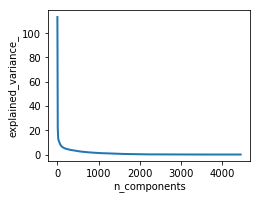

In [31]:
pca = decomposition.PCA()


# Plot the PCA spectrum
pca.fit(X_train_standard)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')


plt.show()

### Looking at the graph and after multiple iterations I decided to use the first 50 components of PCA

In [32]:
pca1 = PCA(n_components=50)
train_features = pca1.fit_transform(X_train_standard)

In [33]:
test_features = pca1.fit_transform(X_test_standard)

In [34]:
# Splitting the dataset into the Training set and Test set

x_train0, x_test0, y_train0, y_test0 = train_test_split(train_features, y_ts, test_size = 0.20, random_state = 0)

# 3. Model selection/tuning

In [140]:
d_train = lgb.Dataset(x_train0, label=y_train0)

params = {}
params['learning_rate'] = 0.05
params['boosting_type'] = 'gbdt'
params['objective'] = 'regression'
params['metric'] = 'mse'
# params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 60
params['max_depth'] = 100
      

clf = lgb.train(params, d_train, 100)

In [141]:
y_pred=clf.predict(x_test0)

In [142]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test0, y_pred)

0.7658811135683264

In [143]:
from sklearn.metrics import median_absolute_error
median_absolute_error(y_test0, y_pred)

0.41810188901834483

In [94]:
predictions1 = clf.predict(test_features)

## Gird search
### ref https://www.kaggle.com/garethjns/microsoft-lightgbm-with-parameter-tuning-0-823

In [311]:
# # Create parameters to search
# gridParams = {    
#     'num_leaves' : [15,25,50,90,250],
#     'min_data' : [5,10,15,30,50],
#     'max_depth': [30,50,70,90],    
#     'colsample_bytree' : [0.65, 0.66],
#     'subsample' : [0.7,0.75],
#     'reg_alpha' : [1,1.2],
#     'reg_lambda' : [1,1.2,1.4],
#     'n_estimators': [20,40,60,80,120]
#     }

In [312]:

# # To view the default model params:
# mdl.get_params().keys()

dict_keys(['boosting_type', 'class_weight', 'colsample_bytree', 'learning_rate', 'max_depth', 'min_child_samples', 'min_child_weight', 'min_split_gain', 'n_estimators', 'n_jobs', 'num_leaves', 'objective', 'random_state', 'reg_alpha', 'reg_lambda', 'silent', 'subsample', 'subsample_for_bin', 'subsample_freq'])

In [ ]:
# # Create classifier to use. Note that parameters have to be input manually
# # not as a dict!
# mdl = lgb.LGBMRegressor(boosting_type= 'gbdt',
#         objective = 'regression',
#         n_jobs = 3,
#         learning_rate =0.05,
#         metric='mse',    
#         random_state= 501, # Updated from 'seed'    
#         sub_feature= 0.5,
#         min_split_gain= np.power(10, -2.5988),
#         reg_alpha= np.power(10, -2.2887),
#         reg_lambda= np.power(10, 1.7570),
#         min_child_weight= np.power(10, -0.1477),
#         verbose= -1,
#         seed= 3,
#         max_bin= 512)             
                       
                       
          
# # Create the grid
# grid = GridSearchCV(mdl, gridParams,cv=5,n_jobs=-1)
# # Run the grid
# grid.fit(x_train0, y_train0)
# # Print the best parameters found
# print(grid.best_params_)
# print(grid.best_score_)

In [95]:
len(predictions1)

49342

In [96]:
predictions1.min()

-0.7327291865305829

In [97]:
predictions1.max()

2.976281952181928

In [98]:
result=scaler.inverse_transform(predictions1)

In [99]:
result=abs(result)

In [100]:
final=pd.DataFrame(data=df_test['ID'])
final['target']=result

In [101]:
final.head()

,ID,target
0,000137c73,1.385385e+07
1,00021489f,6.367687e+06
2,0004d7953,9.550879e+06
3,00056a333,7.624258e+06
4,00056d8eb,5.443874e+06


In [102]:
final.to_csv('test_csv',index=False)